## **AMAZON WEB SCRAPING PROJECT**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# connection with web page address
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.60 Safari/537.36", 
    "X-Amzn-Trace-Id": "Root=1-6245a2b6-1cf3be6e16b13acf418c83b2"}

In [ ]:
#scrapping the data from the website
data = {"title":[], "author":[], "review":[], "year":[], "price":[], "ratings":[]}
for a in range(1,76):
  pages = requests.get(f'https://www.amazon.com/s?k=amazon+shopping+online&i=stripbooks&rh=n%3A283155&dc',
                        headers=headers)
  
  soup = BeautifulSoup(pages.content, "html.parser")



  
  title = soup.find_all('h2', {"class": "a-size-mini a-spacing-none a-color-base s-line-clamp-2"})
  for titles in title:
    data["title"].append(titles.text)
      
  author= soup.find_all('div', {'class':"a-row a-size-base a-color-secondary"})
  for a in author:
    for b in a.find_all('a', {'class':"a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style"}):
      data['author'].append(b.text)

  review=soup.find_all('div', {"class": "a-row a-size-small"})
  for i in review:
    for j in i.find_all('span', {"class": "a-size-base"}):
      data["review"].append(j.text)
    
  year = soup.find_all('div', {'class': "a-row" })
  for a in year:
    for b in a.find_all('span', {'class': 'a-size-base a-color-secondary a-text-normal'}):
      data['year'].append(b.text)

  price = soup.find_all('div', {'class':"a-row a-size-base a-color-base"})
  for a in price:
    for b in a.find_all('span', {'class': 'a-price-whole'}):
      data['price'].append(b.text)

  ratings = soup.find_all('div', {'class':"a-row a-size-small"})
  for a in ratings:
    for b in a.find_all('span', {'class': 'a-declarative'}):
      data['ratings'].append(b.text)

  

 

In [ ]:
#storing the data in a dataframe
books= pd.DataFrame.from_dict(data, orient='index')   
books.T


,title,author,review,year,price,ratings
0,"Shit I Can’t Remember: password book, password...",Frid Huu,"1,826","Dec 5, 2019",6.,4.5 out of 5 stars
1,Publication Manual of the American Psychologic...,American Psychological Association,"25,546","Dec 5, 2019",13.,4.8 out of 5 stars
2,online shopping tracker: Online Shopping Track...,Paper Kate Publishing,2,"Oct 1, 2019",19.,3.0 out of 5 stars
3,WTF Is My Password: Password Book Log Book Alp...,Ava Brinley,"4,982","Oct 1, 2019",26.,4.7 out of 5 stars
4,Everything You Need to Know When I'm Gone - En...,Lourdes Welhaven,"1,617","Dec 9, 2020",28.,4.3 out of 5 stars
...,...,...,...,...,...,...
207,None,None,None,"Jun 1, 2016",None,None
208,None,None,None,"Apr 22, 2021",None,None
209,None,None,None,"Apr 22, 2021",None,None
210,None,None,None,"Jul 1, 2021",None,None


In [ ]:
#saving the data into a csv file 
books.T.to_csv('books.csv', index=False)


In [117]:
books= pd.read_csv("/content/books.csv")
books

,title,author,review,year,price,ratings
0,"Shit I Can’t Remember: password book, password...",Frid Huu,"1,826","Dec 5, 2019",6.0,4.5 out of 5 stars
1,Publication Manual of the American Psychologic...,American Psychological Association,"25,546","Dec 5, 2019",13.0,4.8 out of 5 stars
2,online shopping tracker: Online Shopping Track...,Paper Kate Publishing,2,"Oct 1, 2019",19.0,3.0 out of 5 stars
3,WTF Is My Password: Password Book Log Book Alp...,Ava Brinley,"4,982","Oct 1, 2019",26.0,4.7 out of 5 stars
4,Everything You Need to Know When I'm Gone - En...,Lourdes Welhaven,"1,617","Dec 9, 2020",28.0,4.3 out of 5 stars
...,...,...,...,...,...,...
207,NaN,NaN,NaN,"Jun 1, 2016",NaN,NaN
208,NaN,NaN,NaN,"Apr 22, 2021",NaN,NaN
209,NaN,NaN,NaN,"Apr 22, 2021",NaN,NaN
210,NaN,NaN,NaN,"Jul 1, 2021",NaN,NaN


In [118]:
#missing values
books.isna().sum()

title      106
author     131
review     106
year         0
price       46
ratings    106
dtype: int64

In [119]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    106 non-null    object 
 1   author   81 non-null     object 
 2   review   106 non-null    object 
 3   year     212 non-null    object 
 4   price    166 non-null    float64
 5   ratings  106 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.1+ KB


In [124]:
#dropping missing values
books.dropna(axis=0, inplace= True)

In [121]:
#getting just the year from the column
books['year'] = books['year'].str[-4:]

In [126]:
#removing "," from the review column
books['review'] = books['review'].str.replace(",","")

In [127]:
#converting these columns to integer
books['year'] = books['year'].astype(int)
books['review'] = books['review'].astype(int)


In [128]:
#creating new dataframe with books on sale between  2009 and 2019
books2= books[(books['year'] >= 2009) & (books['year'] <= 2019)]

In [129]:
books2

,title,author,review,year,price,ratings
0,"Shit I Can’t Remember: password book, password...",Frid Huu,1826,2019,6.0,4.5 out of 5 stars
1,Publication Manual of the American Psychologic...,American Psychological Association,25546,2019,13.0,4.8 out of 5 stars
2,online shopping tracker: Online Shopping Track...,Paper Kate Publishing,2,2019,19.0,3.0 out of 5 stars
3,WTF Is My Password: Password Book Log Book Alp...,Ava Brinley,4982,2019,26.0,4.7 out of 5 stars
6,The Cat: The Password Organizer Log That Looks...,Crystal Radke,606,2019,5.0,4.6 out of 5 stars
7,Online Shopping Tracker: Keep Tracking Organiz...,Dave Grohl,1,2019,13.0,1.0 out of 5 stars
8,My First Learn-to-Write Workbook: Practice for...,Helen Schucman,70250,2019,11.0,4.8 out of 5 stars
9,The Storyteller: Tales of Life and Music,Kaplan Test Prep,15054,2019,5.0,4.8 out of 5 stars
10,What the fuck is my password: Password logbook...,Raza Imam,344,2019,9.0,4.4 out of 5 stars
11,A Course in Miracles: Combined Volume,Natalie Berg,5850,2019,6.0,4.7 out of 5 stars


In [134]:
#top books according to reviews
books2_sorted=  books2.sort_values("price", ascending= False)
books2_sorted

,title,author,review,year,price,ratings
53,A Course in Miracles: Combined Volume,Lourdes Welhaven,5850,2019,58.0,4.7 out of 5 stars
29,My First Learn-to-Write Workbook: Practice for...,Marian Robinson,70250,2019,52.0,4.8 out of 5 stars
52,What the fuck is my password: Password logbook...,Ava Brinley,344,2019,31.0,4.4 out of 5 stars
57,Amazon: How the World’s Most Relentless Retail...,Helen Schucman,52,2019,29.0,4.4 out of 5 stars
24,WTF Is My Password: Password Book Log Book Alp...,Helen Schucman,4982,2019,29.0,4.7 out of 5 stars
37,Pre-Owned Clothing Business Startup: How to St...,Melly Nofal,80,2016,28.0,4.3 out of 5 stars
70,"WTF Is My Password: password book, password lo...",Melly Nofal,2228,2019,28.0,4.7 out of 5 stars
3,WTF Is My Password: Password Book Log Book Alp...,Ava Brinley,4982,2019,26.0,4.7 out of 5 stars
36,Amazon: How the World’s Most Relentless Retail...,Lourdes Welhaven,52,2016,26.0,4.4 out of 5 stars
50,My First Learn-to-Write Workbook: Practice for...,American Psychological Association,70250,2019,23.0,4.8 out of 5 stars


In [135]:
top_priced_books = books2[['title', 'price']]
top_priced_books

,title,price
0,"Shit I Can’t Remember: password book, password...",6.0
1,Publication Manual of the American Psychologic...,13.0
2,online shopping tracker: Online Shopping Track...,19.0
3,WTF Is My Password: Password Book Log Book Alp...,26.0
6,The Cat: The Password Organizer Log That Looks...,5.0
7,Online Shopping Tracker: Keep Tracking Organiz...,13.0
8,My First Learn-to-Write Workbook: Practice for...,11.0
9,The Storyteller: Tales of Life and Music,5.0
10,What the fuck is my password: Password logbook...,9.0
11,A Course in Miracles: Combined Volume,6.0


In [136]:
top_priced_books_sorted_desc= top_priced_books.sort_values('price',ascending=False)
 

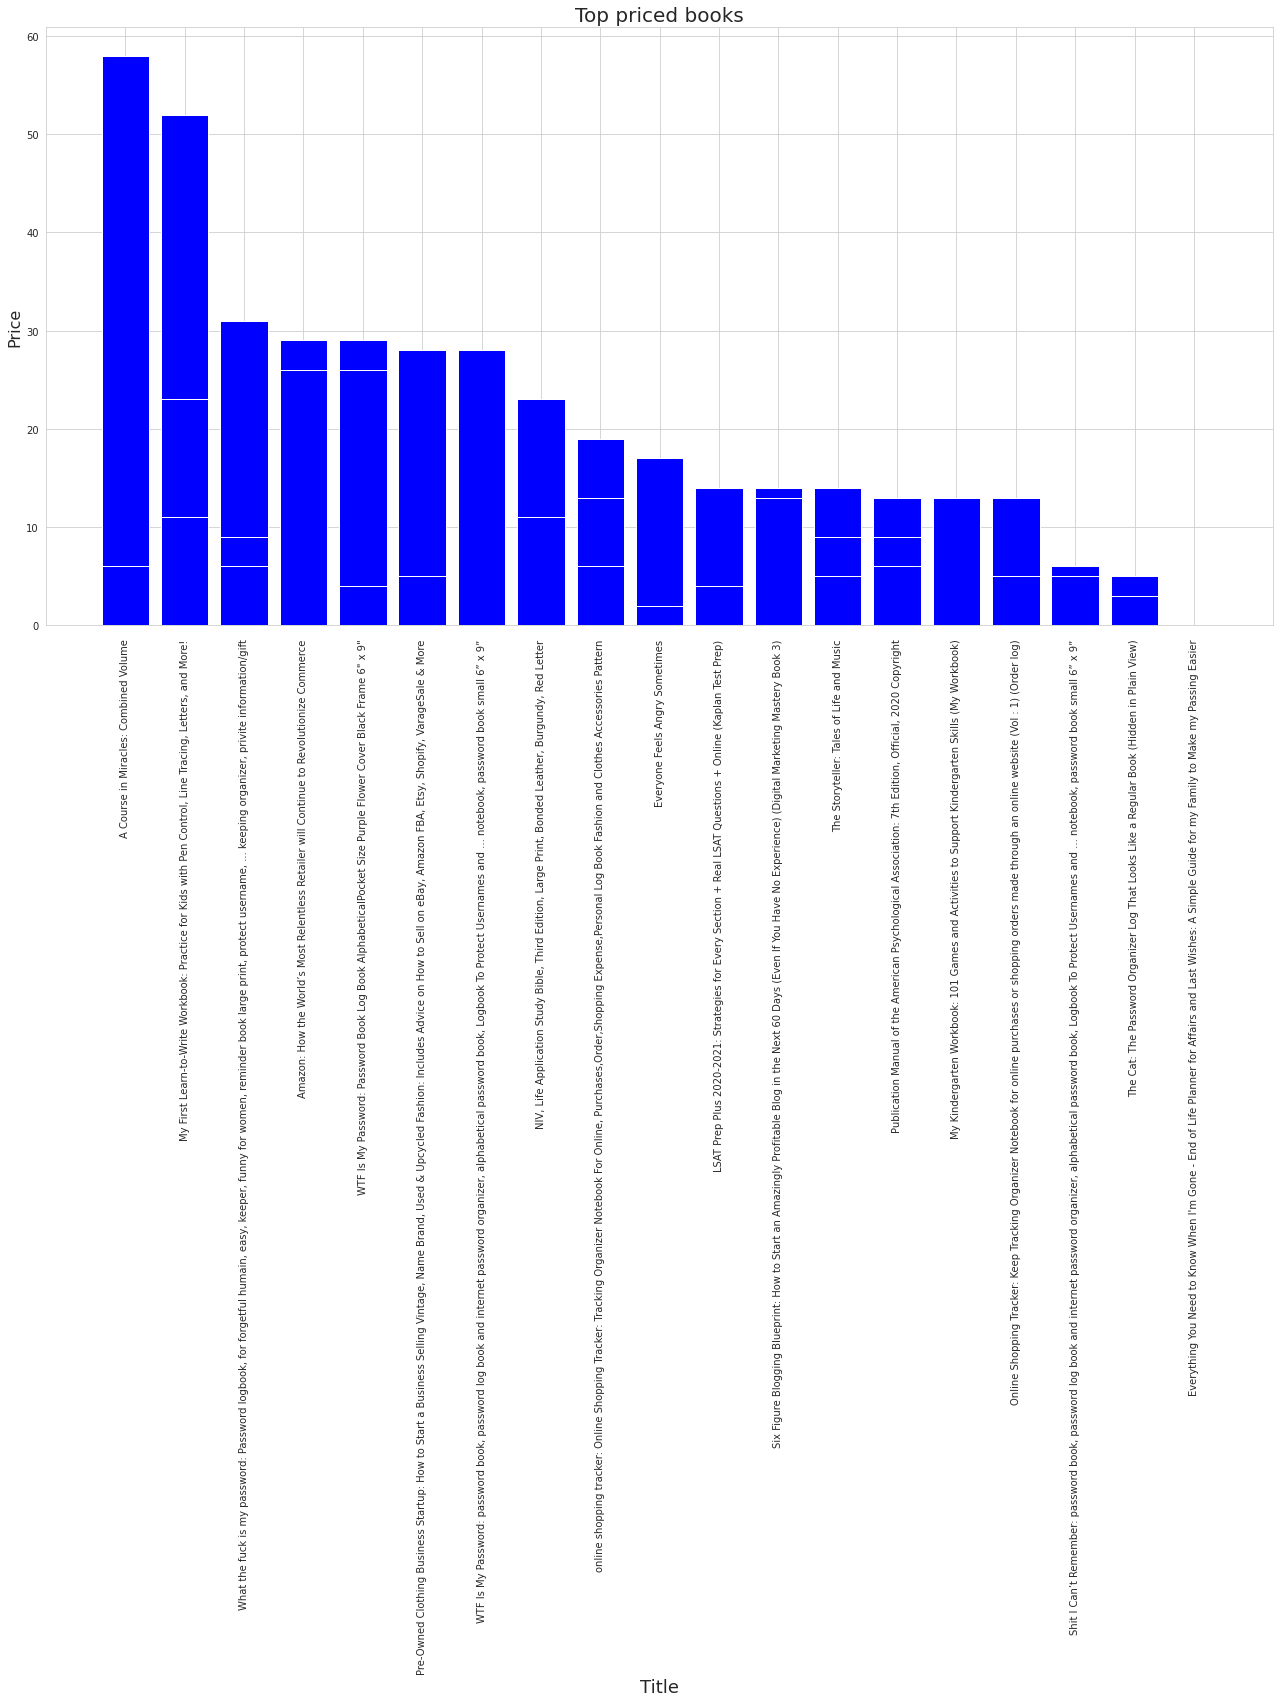

In [137]:
#chart showing top priced books
fig= plt.figure(figsize=(22, 11))
plt.bar(top_priced_books_sorted_desc['title'],top_priced_books_sorted_desc['price'],color='blue')
plt.title('Top priced books', fontsize= 20)
plt.xlabel('Title', fontsize= 18)
plt.ylabel('Price', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Top priced books')

In [138]:
top_reviewed_books = books2[['title', 'review']]
top_reviewed_books



,title,review
0,"Shit I Can’t Remember: password book, password...",1826
1,Publication Manual of the American Psychologic...,25546
2,online shopping tracker: Online Shopping Track...,2
3,WTF Is My Password: Password Book Log Book Alp...,4982
6,The Cat: The Password Organizer Log That Looks...,606
7,Online Shopping Tracker: Keep Tracking Organiz...,1
8,My First Learn-to-Write Workbook: Practice for...,70250
9,The Storyteller: Tales of Life and Music,15054
10,What the fuck is my password: Password logbook...,344
11,A Course in Miracles: Combined Volume,5850


In [139]:
top_reviewed_books_sorted_desc= top_reviewed_books.sort_values('review',ascending=False)
top_reviewed_books_sorted_desc

,title,review
50,My First Learn-to-Write Workbook: Practice for...,70250
8,My First Learn-to-Write Workbook: Practice for...,70250
29,My First Learn-to-Write Workbook: Practice for...,70250
1,Publication Manual of the American Psychologic...,25546
66,Publication Manual of the American Psychologic...,25546
43,Publication Manual of the American Psychologic...,25546
51,The Storyteller: Tales of Life and Music,15054
30,The Storyteller: Tales of Life and Music,15054
9,The Storyteller: Tales of Life and Music,15054
73,My Kindergarten Workbook: 101 Games and Activi...,6648


In [144]:
#top 10 reviewed books
topbooks = top_reviewed_books_sorted_desc.nlargest(10, ['review'])
topbooks

,title,review
50,My First Learn-to-Write Workbook: Practice for...,70250
8,My First Learn-to-Write Workbook: Practice for...,70250
29,My First Learn-to-Write Workbook: Practice for...,70250
1,Publication Manual of the American Psychologic...,25546
66,Publication Manual of the American Psychologic...,25546
43,Publication Manual of the American Psychologic...,25546
51,The Storyteller: Tales of Life and Music,15054
30,The Storyteller: Tales of Life and Music,15054
9,The Storyteller: Tales of Life and Music,15054
73,My Kindergarten Workbook: 101 Games and Activi...,6648


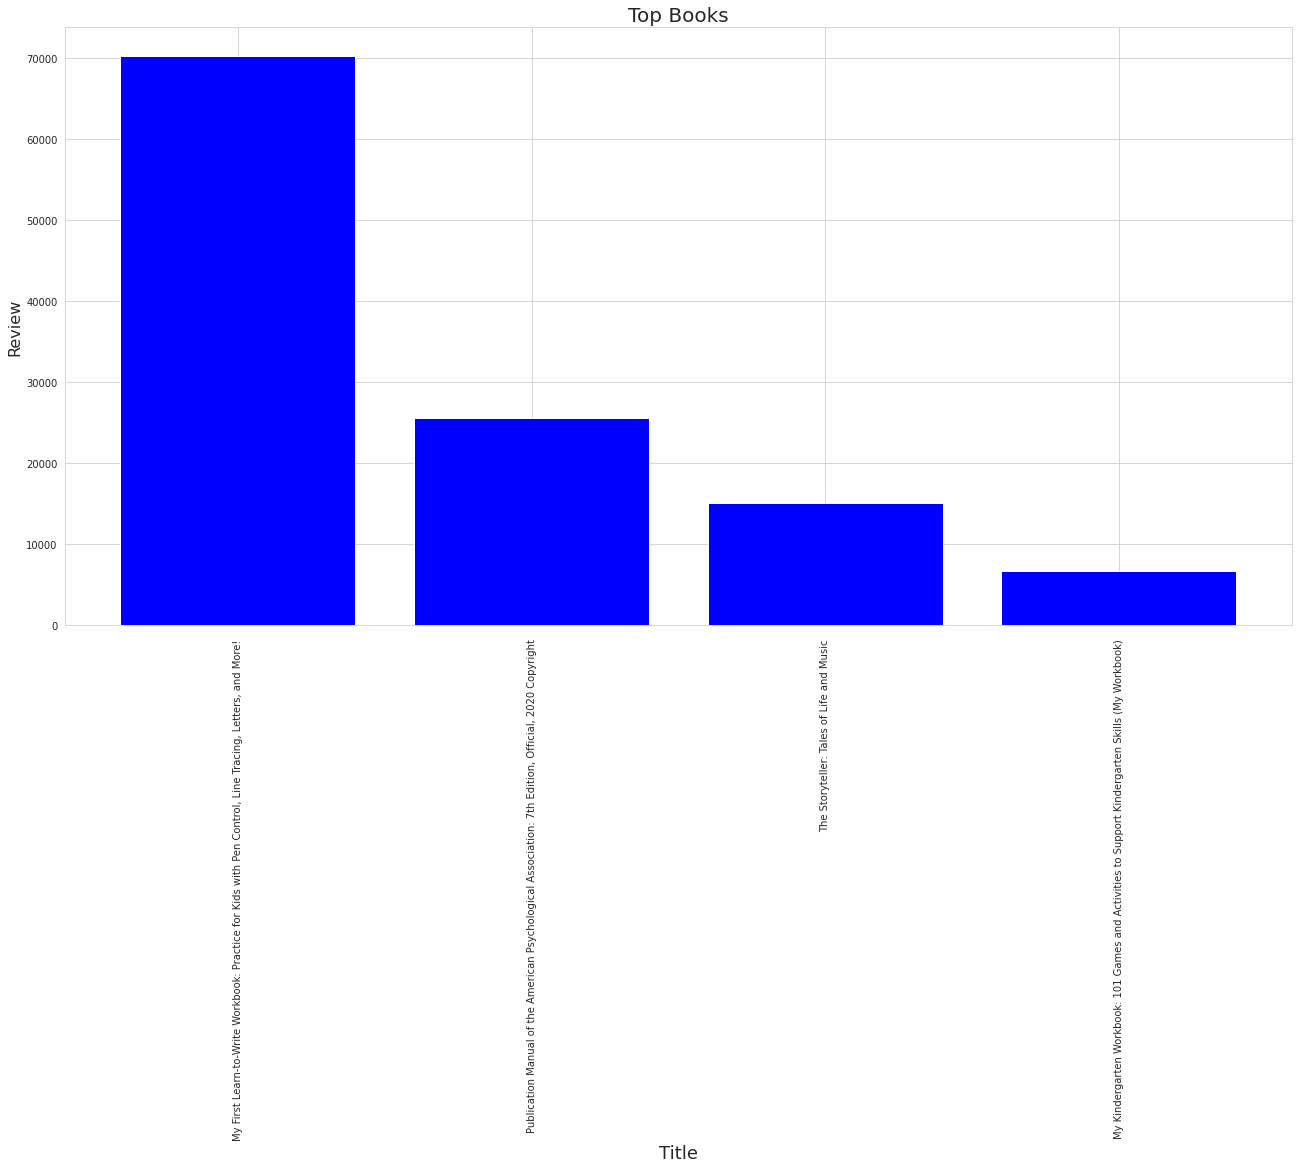

In [145]:
#chart showing top reviewed books
fig= plt.figure(figsize=(22, 11))
plt.bar(topbooks['title'],topbooks['review'],color='blue')
plt.title('Top Books', fontsize= 20)
plt.xlabel('Title', fontsize= 18)
plt.ylabel('Review', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Top Books')

In [71]:
#authors of books
authors = books2['author'].value_counts()
authors = authors.to_frame().reset_index()
authors = authors.head(10)
authors


,index,author
0,American Psychological Association,4
1,Helen Schucman,4
2,Frid Huu,3
3,Kaplan Test Prep,3
4,Melly Nofal,3
5,Marian Robinson,3
6,Miya Knights,3
7,Raza Imam,3
8,Dave Grohl,3
9,Crystal Radke,3


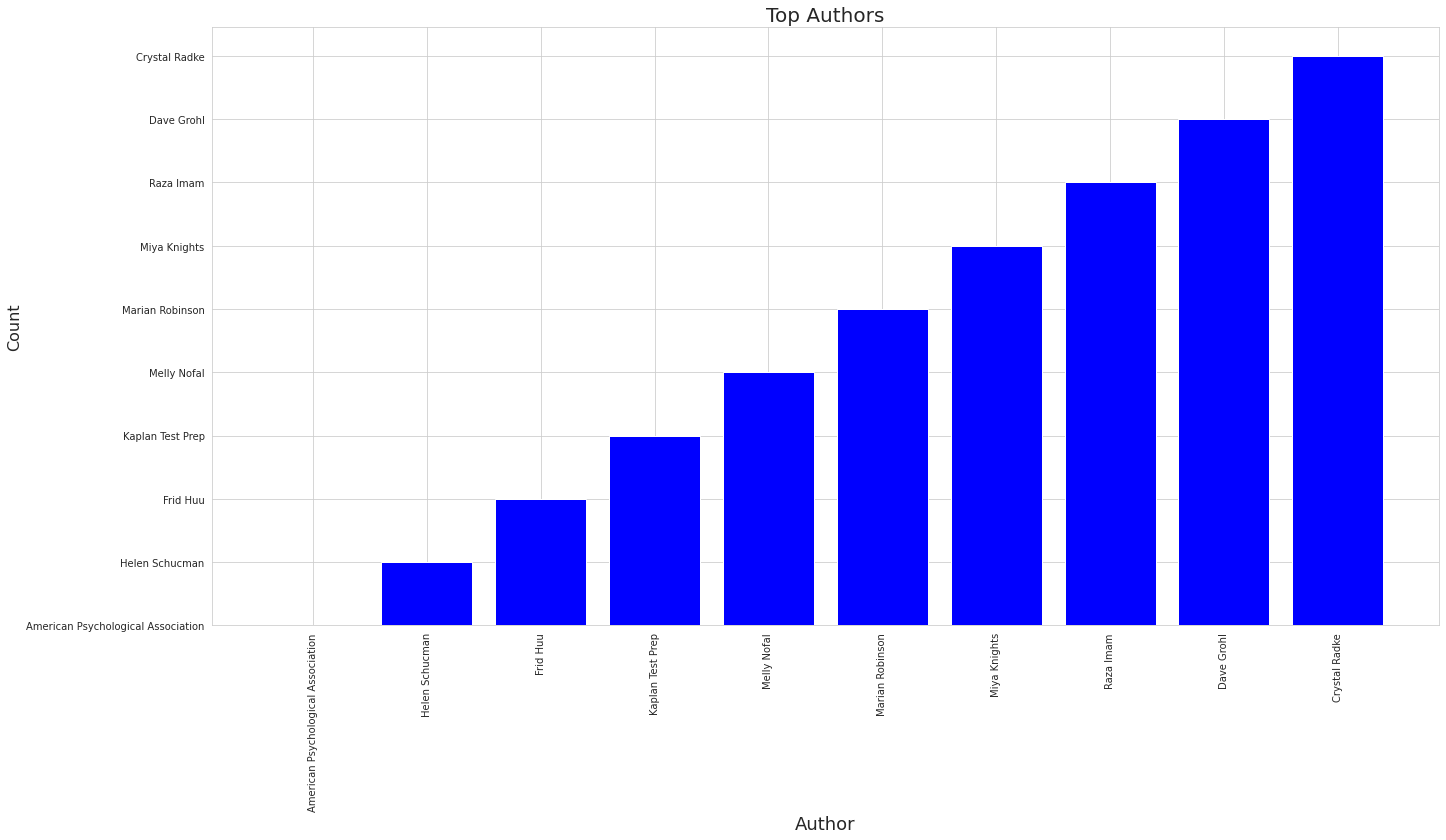

In [73]:
#chart showing authors and number of books they have
fig= plt.figure(figsize=(22, 11))
plt.bar(authors['index'],authors['index'],color='blue')
plt.title('Top Authors', fontsize= 20)
plt.xlabel('Author', fontsize= 18)
plt.ylabel('Count', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Top Authors')